Importamos las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris") # aqui cargamos el dataset

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris_v = iris[iris['species'] != 'setosa'] # creamos una variable donde quitamos de la columna species "setosa"

In [11]:
iris_v.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


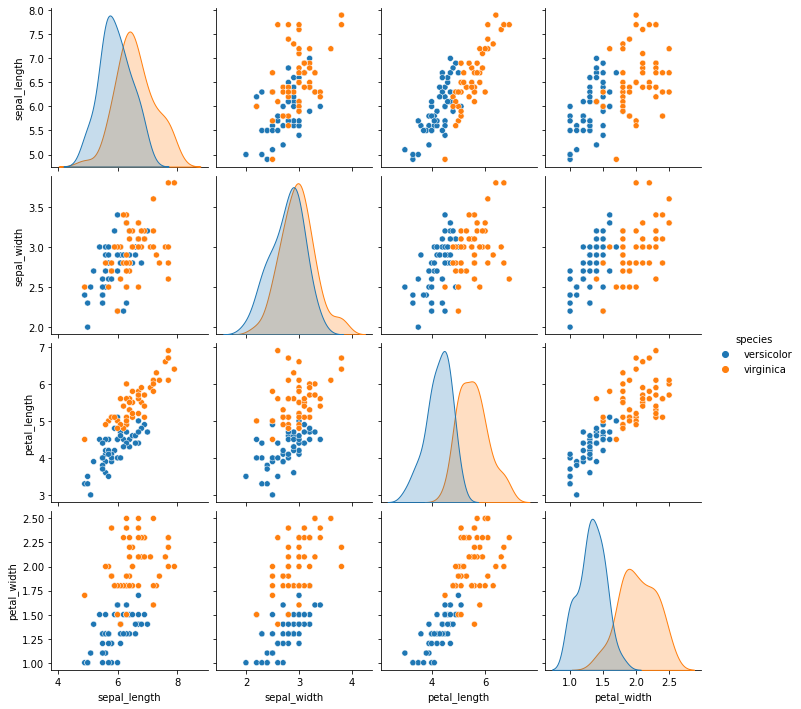

In [12]:
sns.pairplot(iris_v, hue= 'species')

In [13]:
# vamos a crear las vareiables X y eliminamos la columna species. axis=1 por que es una columna
X = iris_v.drop('species', axis=1)
# vamos a crear las vareiables y con 'species es la que se quiere predecir
y = iris_v['species']

In [14]:
from sklearn.model_selection import train_test_split # nos ayuda a separa en test y train

In [15]:
# Separar en train y test
# test_size es el tamaño del conjunto de datos de para test
# train_test_split divide arreglos o matrices en subconjuntos aleatorios de train y test. 
# Eso significa que cada vez que lo ejecute sin especificar random_state, obtendrá un resultado diferente, este es el comportamiento esperado
# pero. Por otro lado, si usa random_state=un_valor_X, puede garantizar que la salida de la Ejecución 1 será igual a la salida de la Ejecución 2 
# es decir, su división será siempre la misma.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [16]:
from sklearn.linear_model import LogisticRegression # importamos el modelo de regresion logistica

In [17]:
logmodel = LogisticRegression() # instanciamos el modelo

In [19]:
# hacemos el fit, utilizar los datos de train
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predicciones = logmodel.predict(X_test) # creamos las predicciones

In [22]:
predicciones

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [23]:
# metricas de clasificacion
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.94      0.97        18

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
# matriz de confusion
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, predicciones)

array([[12,  0],
       [ 1, 17]])

In [27]:
# curva ROC
from sklearn.metrics import roc_curve

In [28]:
# scamaos las probabilidades sobre test, de la segunda columna
y_pred_prob = logmodel.predict_proba(X_test)[:,1]

In [30]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob,'virginica') # fpr'ratio de falso positivo', tpr'ratio de verdadero positivo', thresholds''|(y_true"y_test", y_score"y_pred_prob",pos_label"'virginica'")

Text(0.5, 1.0, 'Curva ROC')

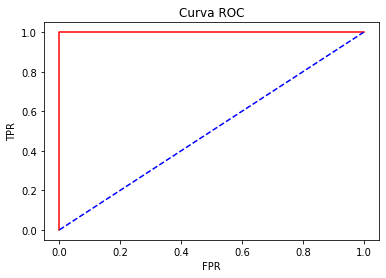

In [31]:
plt.plot(fpr,tpr, color = 'red', label = 'Curva ROC')
plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')